Basic Statistics:
              Size    Bedrooms   Bathrooms    Basement   Furnished  \
count   232.000000  232.000000  232.000000  232.000000  232.000000   
mean    828.185345    1.603448    1.435345    0.060345    0.439655   
std     385.777615    0.924691    0.617319    0.238639    0.497418   
min     120.000000    0.000000    1.000000    0.000000    0.000000   
25%     588.250000    1.000000    1.000000    0.000000    0.000000   
50%     727.000000    1.000000    1.000000    0.000000    0.000000   
75%     976.000000    2.000000    2.000000    0.000000    1.000000   
max    3800.000000    6.000000    5.500000    1.000000    1.000000   

               AC  Washer/Dryer     Pets OK        Price  
count  232.000000    232.000000  232.000000   232.000000  
mean     0.202586      0.797414    0.323276  3427.034483  
std      0.402796      0.402796    0.468738  1354.032259  
min      0.000000      0.000000    0.000000  1350.000000  
25%      0.000000      1.000000    0.000000  2537.500000

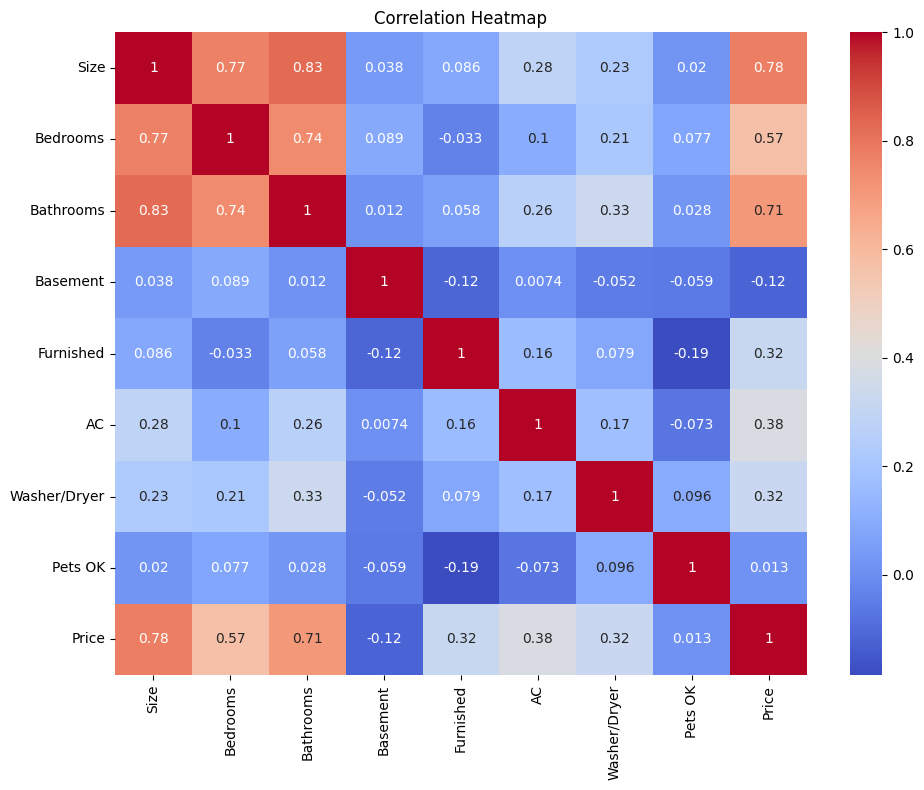

In [16]:
#Test Model 1 (All Variables)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create feature matrix X and target variable y
    # Excluding 'Location' since it's categorical
    features = ['Size', 'Bedrooms', 'Bathrooms', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer', 'Pets OK']
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

In [12]:
from utils.rental_analysis import analyze_rental_data, predict_rental_price

# Using full path for CSV
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

# Test a prediction
test_property = {
    'Size': 1000,
    'Bedrooms': 2,
    'Bathrooms': 2,
    'Basement': 0,
    'Furnished': 1,
    'AC': 1,
    'Washer/Dryer': 1,
    'Pets OK': 1
}

price = predict_rental_price(model_lr, scaler, test_property)
print(f"Predicted Price: ${price[0]:,.2f}")

ImportError: cannot import name 'analyze_rental_data' from 'utils.rental_analysis' (c:\Users\grego\GitHub\DataAnalysis\utils\rental_analysis.py)

Basic Statistics:
         Bedrooms   Bathrooms    Basement   Furnished          AC  \
count  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     1.603448    1.435345    0.060345    0.439655    0.202586   
std      0.924691    0.617319    0.238639    0.497418    0.402796   
min      0.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    0.000000    0.000000    0.000000   
75%      2.000000    2.000000    0.000000    1.000000    0.000000   
max      6.000000    5.500000    1.000000    1.000000    1.000000   

       Washer/Dryer     Pets OK        Price  
count    232.000000  232.000000   232.000000  
mean       0.797414    0.323276  3427.034483  
std        0.402796    0.468738  1354.032259  
min        0.000000    0.000000  1350.000000  
25%        1.000000    0.000000  2537.500000  
50%        1.000000    0.000000  3147.500000  
75%        1.000000    1.000000

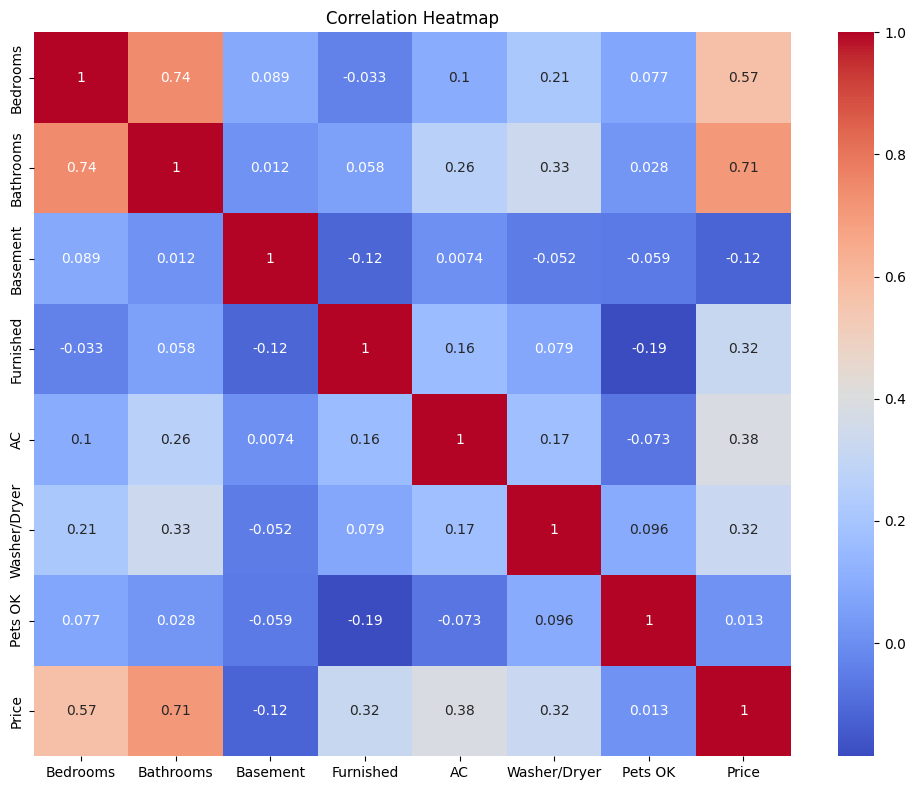

In [17]:
#Test Model 2 (Excluding Size)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create feature matrix X and target variable y
    # Excluding 'Location' since it's categorical
    features = ['Bedrooms', 'Bathrooms', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer', 'Pets OK']
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Basic Statistics:
         Bedrooms   Bathrooms    Basement   Furnished          AC  \
count  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     1.603448    1.435345    0.060345    0.439655    0.202586   
std      0.924691    0.617319    0.238639    0.497418    0.402796   
min      0.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    0.000000    0.000000    0.000000   
75%      2.000000    2.000000    0.000000    1.000000    0.000000   
max      6.000000    5.500000    1.000000    1.000000    1.000000   

       Washer/Dryer        Price  
count    232.000000   232.000000  
mean       0.797414  3427.034483  
std        0.402796  1354.032259  
min        0.000000  1350.000000  
25%        1.000000  2537.500000  
50%        1.000000  3147.500000  
75%        1.000000  3950.000000  
max        1.000000  8995.000000  

Correlation with Price:
Price           1.00

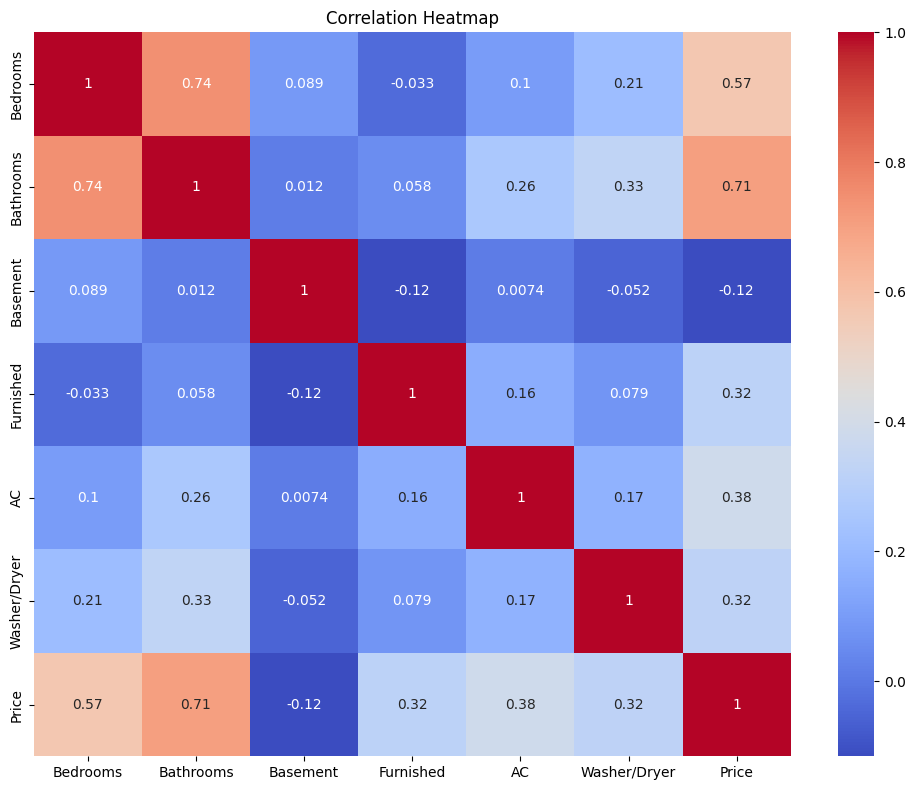

In [18]:
#Test Model 3 (Excluding Size & Pets)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create feature matrix X and target variable y
    # Excluding 'Location' since it's categorical
    features = ['Bedrooms', 'Bathrooms', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer']
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Basic Statistics:
         Bedrooms  Log_Bathrooms    Basement   Furnished          AC  \
count  232.000000     232.000000  232.000000  232.000000  232.000000   
mean     1.603448       0.286528    0.060345    0.439655    0.202586   
std      0.924691       0.371758    0.238639    0.497418    0.402796   
min      0.000000       0.000000    0.000000    0.000000    0.000000   
25%      1.000000       0.000000    0.000000    0.000000    0.000000   
50%      1.000000       0.000000    0.000000    0.000000    0.000000   
75%      2.000000       0.693147    0.000000    1.000000    0.000000   
max      6.000000       1.704748    1.000000    1.000000    1.000000   

       Washer/Dryer        Price  
count    232.000000   232.000000  
mean       0.797414  3427.034483  
std        0.402796  1354.032259  
min        0.000000  1350.000000  
25%        1.000000  2537.500000  
50%        1.000000  3147.500000  
75%        1.000000  3950.000000  
max        1.000000  8995.000000  

Correlation with 

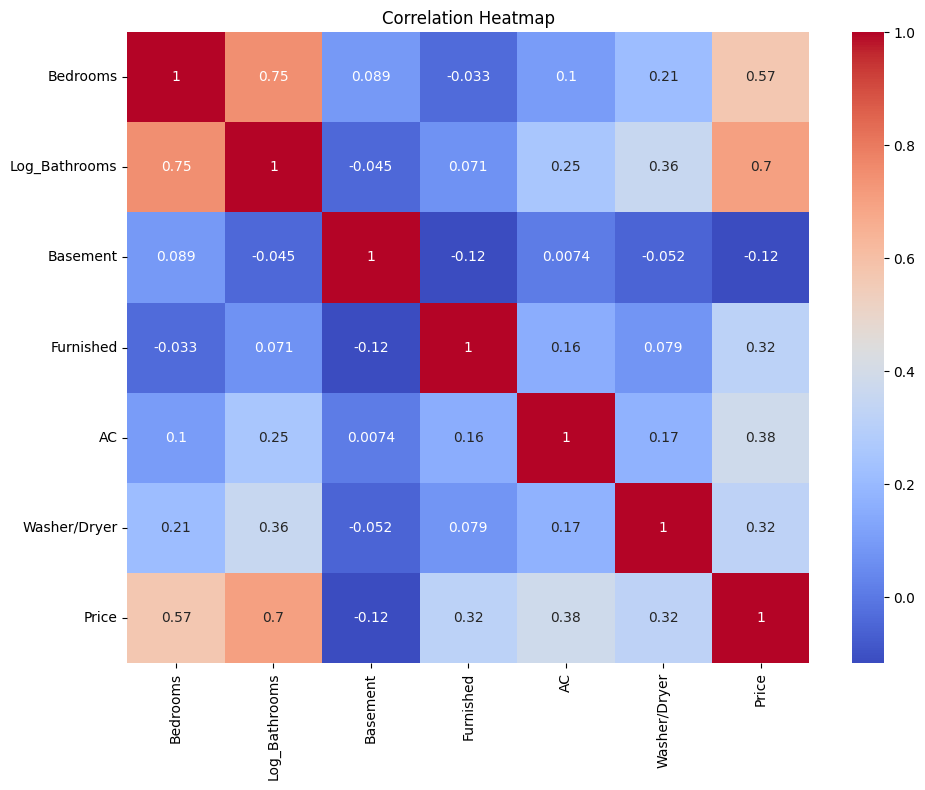

In [20]:
#Test Model 4 (Excluding Size & Pets & Log on bathrooms)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Log transform bathrooms
    data['Log_Bathrooms'] = np.log(data['Bathrooms'])

    # Create feature matrix X and target variable y
    # Excluding 'Location' since it's categorical
    features = ['Bedrooms', 'Log_Bathrooms', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer']
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Basic Statistics:
         Bedrooms  Bath_Bed_Ratio    Basement   Furnished          AC  \
count  232.000000      232.000000  232.000000  232.000000  232.000000   
mean     1.603448        1.550913    0.060345    0.439655    0.202586   
std      0.924691        2.462729    0.238639    0.497418    0.402796   
min      0.000000        0.322581    0.000000    0.000000    0.000000   
25%      1.000000        0.909091    0.000000    0.000000    0.000000   
50%      1.000000        0.909091    0.000000    0.000000    0.000000   
75%      2.000000        0.952381    0.000000    1.000000    0.000000   
max      6.000000       10.000000    1.000000    1.000000    1.000000   

       Washer/Dryer        Price  
count    232.000000   232.000000  
mean       0.797414  3427.034483  
std        0.402796  1354.032259  
min        0.000000  1350.000000  
25%        1.000000  2537.500000  
50%        1.000000  3147.500000  
75%        1.000000  3950.000000  
max        1.000000  8995.000000  

Correlat

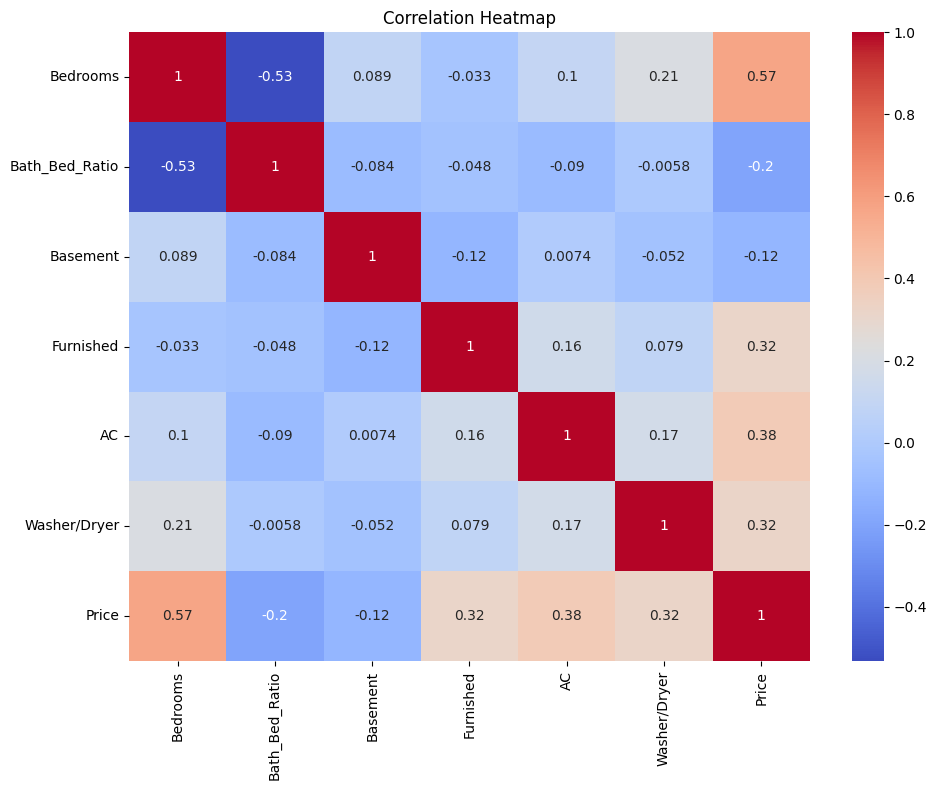

In [22]:
#Test Model 5 (Excluding Size & Pets & Log on bathrooms)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create bathroom per bedroom ratio (adding small number to avoid division by zero)
    data['Bath_Bed_Ratio'] = data['Bathrooms'] / (data['Bedrooms'] + 0.1)
    
    # Create feature matrix X and target variable y
    features = ['Bedrooms', 'Bath_Bed_Ratio', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer']
    
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Basic Statistics:
         Bedrooms   Bathrooms  Bed_Bath_Interaction    Basement   Furnished  \
count  232.000000  232.000000            232.000000  232.000000  232.000000   
mean     1.603448    1.435345              2.724138    0.060345    0.439655   
std      0.924691    0.617319              2.871222    0.238639    0.497418   
min      0.000000    1.000000              0.000000    0.000000    0.000000   
25%      1.000000    1.000000              1.000000    0.000000    0.000000   
50%      1.000000    1.000000              1.750000    0.000000    0.000000   
75%      2.000000    2.000000              4.000000    0.000000    1.000000   
max      6.000000    5.500000             27.500000    1.000000    1.000000   

               AC  Washer/Dryer        Price  
count  232.000000    232.000000   232.000000  
mean     0.202586      0.797414  3427.034483  
std      0.402796      0.402796  1354.032259  
min      0.000000      0.000000  1350.000000  
25%      0.000000      1.000000  25

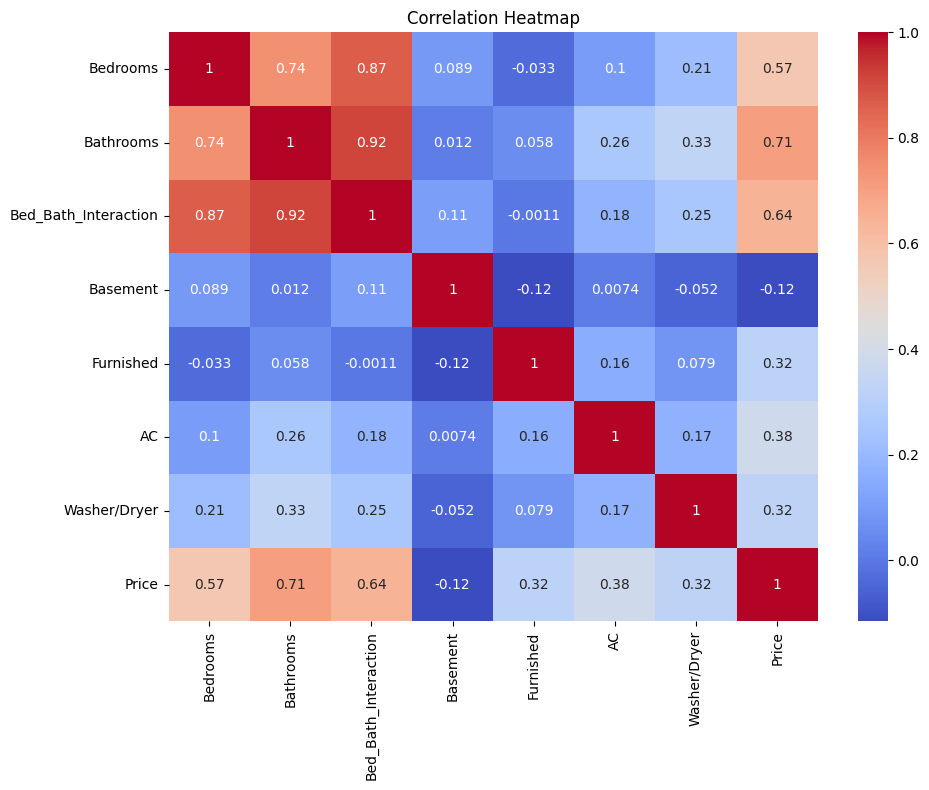

In [23]:
#Test Model 6 (Excluding Size & Pets & Log on bathrooms)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create interaction term
    data['Bed_Bath_Interaction'] = data['Bathrooms'] * data['Bedrooms']
    
    # Create feature matrix X and target variable y
    features = ['Bedrooms', 'Bathrooms', 'Bed_Bath_Interaction', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer',]
    
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Basic Statistics:
       Total_Rooms    Basement   Furnished          AC  Washer/Dryer  \
count   232.000000  232.000000  232.000000  232.000000    232.000000   
mean      2.321121    0.060345    0.439655    0.202586      0.797414   
std       1.172514    0.238639    0.497418    0.402796      0.402796   
min       0.500000    0.000000    0.000000    0.000000      0.000000   
25%       1.500000    0.000000    0.000000    0.000000      1.000000   
50%       1.875000    0.000000    0.000000    0.000000      1.000000   
75%       3.000000    0.000000    1.000000    0.000000      1.000000   
max       7.750000    1.000000    1.000000    1.000000      1.000000   

             Price  
count   232.000000  
mean   3427.034483  
std    1354.032259  
min    1350.000000  
25%    2537.500000  
50%    3147.500000  
75%    3950.000000  
max    8995.000000  

Correlation with Price:
Price           1.000000
Total_Rooms     0.637014
AC              0.384717
Washer/Dryer    0.322332
Furnished       0.3

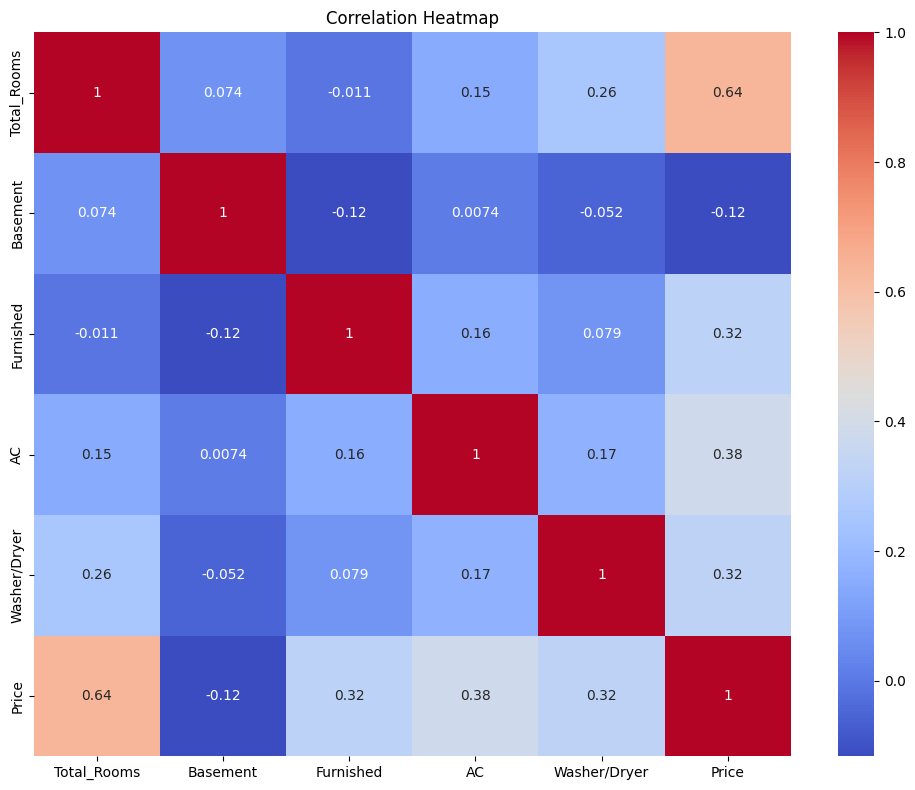

In [24]:
#Test Model 6 (Excluding Size & Pets & Log on bathrooms)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Create combined
    data['Total_Rooms'] = data['Bedrooms'] + (0.5 * data['Bathrooms'])
    
    # Create feature matrix X and target variable y
    features = ['Total_Rooms', 'Basement', 
                'Furnished', 'AC', 'Washer/Dryer',]
    
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y  # Only return numeric columns

def analyze_rental_data(filepath):
    # Load data
    data, X, y = load_and_prepare_data(filepath)
    
    # 1. Basic Statistics
    print("Basic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test it
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv"
model_stats, model_lr, scaler = analyze_rental_data(file_path)

Analyzing 209 properties under $5,000

Basic Statistics:
              Size  Total_Rooms    Basement   Furnished  Washer/Dryer  \
count   209.000000   209.000000  209.000000  209.000000    209.000000   
mean    757.181818     2.169856    0.062201    0.401914      0.775120   
std     267.131442     1.037100    0.242100    0.491462      0.418506   
min     120.000000     0.500000    0.000000    0.000000      0.000000   
25%     570.000000     1.500000    0.000000    0.000000      1.000000   
50%     700.000000     1.500000    0.000000    0.000000      1.000000   
75%     900.000000     3.000000    0.000000    1.000000      1.000000   
max    1681.000000     5.000000    1.000000    1.000000      1.000000   

             Price  
count   209.000000  
mean   3079.028708  
std     817.535414  
min    1350.000000  
25%    2500.000000  
50%    2895.000000  
75%    3600.000000  
max    5000.000000  

Correlation with Price:
Price           1.000000
Size            0.706106
Total_Rooms     0.624

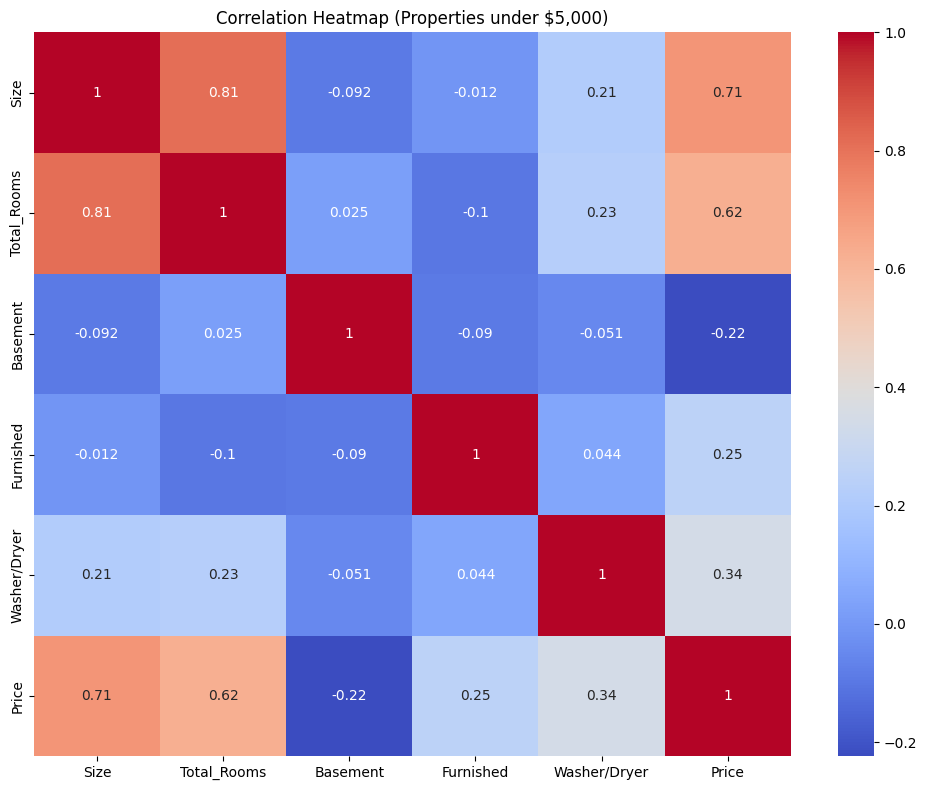

In [29]:
#Test model 7 (max price of $5000)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath, max_price=5000):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Filter data for prices below max_price
    data = data[data['Price'] <= max_price]
    
    # Create combined rooms feature
    data['Total_Rooms'] = data['Bedrooms'] + (0.5 * data['Bathrooms'])
    
    # Create feature matrix X and target variable y
    features = ['Size', 'Total_Rooms', 'Basement', 
                'Furnished', 'Washer/Dryer']
    
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y

def analyze_rental_data(filepath, max_price=5000):
    # Load data
    data, X, y = load_and_prepare_data(filepath, max_price)
    
    # Print data size after filtering
    print(f"Analyzing {len(data)} properties under ${max_price:,}")
    
    # 1. Basic Statistics
    print("\nBasic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Properties under ${max_price:,})')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test the modified functions
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv" 
model_stats, model_lr, scaler = analyze_rental_data(file_path, max_price=5000)

Analyzing 209 properties under $5,000

Size_vs_Similar Metric Explanation:
Values > 1: Larger than typical for this room configuration
Values < 1: Smaller than typical for this room configuration

Typical sizes by room configuration:
               Size          Price
             median count     mean
Total_Rooms                       
0.50          449.5    18  2461.11
1.50          610.0    97  2678.43
2.50          857.5    22  3130.91
2.75         1000.0     2  3750.00
3.00          900.0    41  3662.68
3.25         1249.0     1  4450.00
3.50         1000.0     3  2896.67
3.75          894.0     5  3732.00
4.00         1136.0    13  3937.77
4.25         1342.0     4  4483.75
4.50         1418.0     2  4166.50
5.00         1200.0     1  3600.00

Basic Statistics:
       Size_vs_Similar    Basement   Furnished  Washer/Dryer        Price  \
count       209.000000  209.000000  209.000000    209.000000   209.000000   
mean          1.000676    0.062201    0.401914      0.775120  3079.0

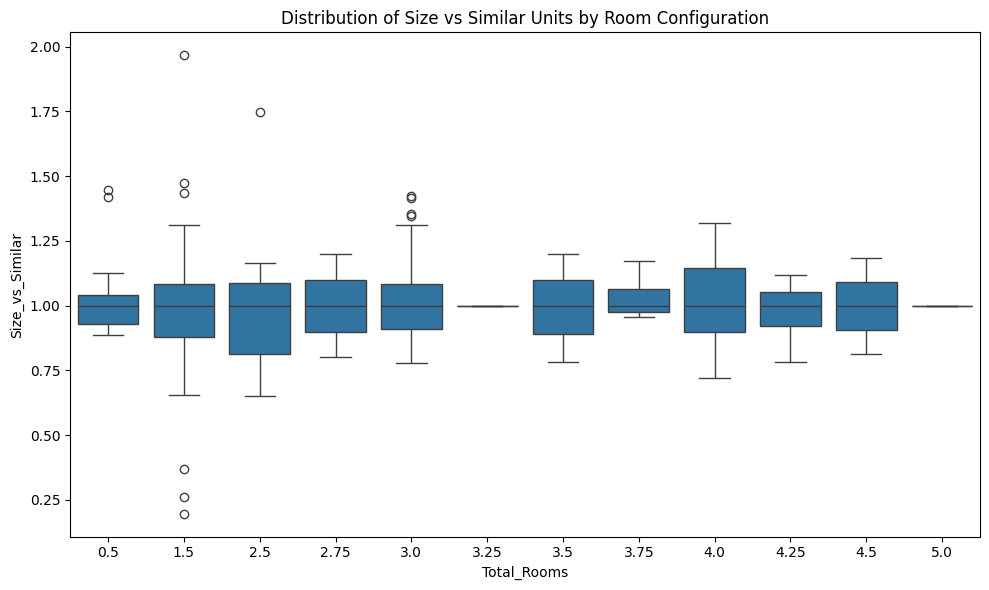

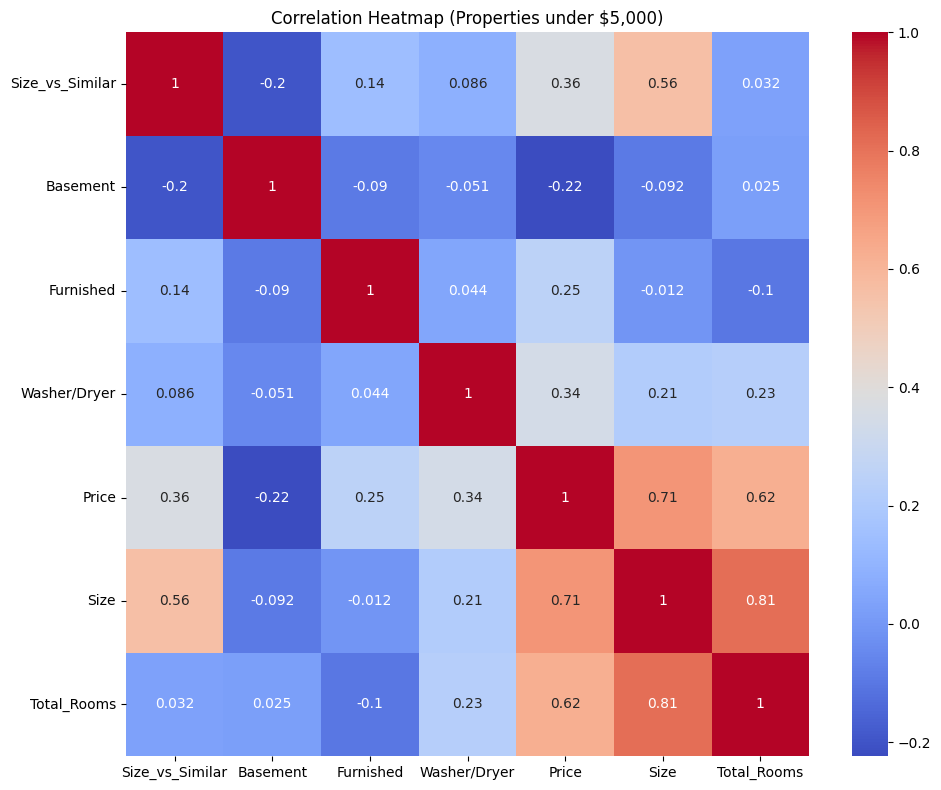

In [33]:
#Test Model 8 (combining size, bathrooms, bedrooms)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath, max_price=5000):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Filter data for prices below max_price
    data = data[data['Price'] <= max_price]
    
    # Create combined rooms feature
    data['Total_Rooms'] = data['Bedrooms'] + (0.5 * data['Bathrooms'])
    
    # Group by room configuration and calculate median size
    room_medians = data.groupby('Total_Rooms')['Size'].median()
    
    # Calculate normalized size (how much bigger/smaller than typical for this configuration)
    data['Size_vs_Similar'] = data.apply(
        lambda row: (row['Size'] / room_medians[row['Total_Rooms']]), 
        axis=1
    )
    
    # Create feature matrix X and target variable y
    # Note: Removed individual Size and Total_Rooms, replaced with combined metric
    features = ['Size_vs_Similar', 'Basement', 
                'Furnished', 'Washer/Dryer']
    
    X = data[features]
    y = data['Price']
    
    # Return raw data for analysis
    return data[features + ['Price', 'Size', 'Total_Rooms']], X, y

def analyze_rental_data(filepath, max_price=5000):
    # Load data
    data, X, y = load_and_prepare_data(filepath, max_price)
    
    # Print data size and explanation of new metric
    print(f"Analyzing {len(data)} properties under ${max_price:,}")
    print("\nSize_vs_Similar Metric Explanation:")
    print("Values > 1: Larger than typical for this room configuration")
    print("Values < 1: Smaller than typical for this room configuration")
    
    # Print average sizes by room configuration
    print("\nTypical sizes by room configuration:")
    print(data.groupby('Total_Rooms').agg({
        'Size': ['median', 'count'],
        'Price': 'mean'
    }).round(2))
    
    # 1. Basic Statistics
    print("\nBasic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of Size vs Similar across room configurations
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Total_Rooms', y='Size_vs_Similar')
    plt.title('Distribution of Size vs Similar Units by Room Configuration')
    plt.tight_layout()
    plt.show()
    
    # 6. Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Properties under ${max_price:,})')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features, room_medians):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    room_medians: Series of median sizes by room configuration from training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    # Calculate Total_Rooms if not provided
    if 'Total_Rooms' not in features.columns:
        features['Total_Rooms'] = features['Bedrooms'] + (0.5 * features['Bathrooms'])
    
    # Calculate Size_vs_Similar
    features['Size_vs_Similar'] = features.apply(
        lambda row: (row['Size'] / room_medians[row['Total_Rooms']]), 
        axis=1
    )
    
    features_scaled = scaler.transform(features[['Size_vs_Similar', 'Basement', 
                                               'Furnished', 'AC', 'Washer/Dryer']])
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test the modified functions
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv" 
model_stats, model_lr, scaler = analyze_rental_data(file_path, max_price=5000)

Analyzing 209 properties under $5,000

Size_Room_Index Explanation:
Combined metric weighing both size (70%) and room count (30%)
Higher values indicate larger properties with more rooms

Basic Statistics:
       Size_Room_Index    Basement   Furnished  Washer/Dryer        Price
count       209.000000  209.000000  209.000000    209.000000   209.000000
mean        739.803668    0.062201    0.401914      0.775120  3079.028708
std         281.837465    0.242100    0.491462      0.418506   817.535414
min         224.066667    0.000000    0.000000      0.000000  1350.000000
25%         534.166667    0.000000    0.000000      1.000000  2500.000000
50%         630.066667    0.000000    0.000000      1.000000  2895.000000
75%         928.266667    0.000000    1.000000      1.000000  3600.000000
max        1628.966667    1.000000    1.000000      1.000000  5000.000000

Correlation with Price:
Price              1.000000
Size_Room_Index    0.707765
Washer/Dryer       0.340800
Furnished          

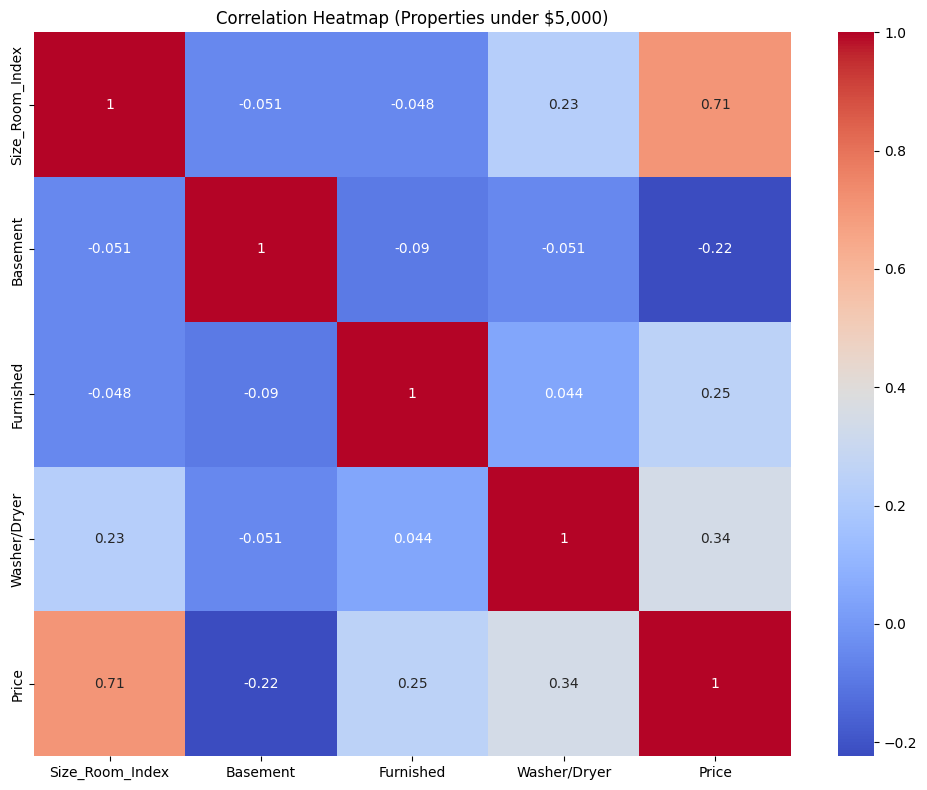

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath, max_price=5000):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Filter data for prices below max_price
    data = data[data['Price'] <= max_price]
    
    # Create combined rooms feature
    data['Total_Rooms'] = data['Bedrooms'] + (0.5 * data['Bathrooms'])
    
    # Create a combined size-room index
    # Scale both metrics to 0-1 range first
    size_scaled = (data['Size'] - data['Size'].min()) / (data['Size'].max() - data['Size'].min())
    rooms_scaled = (data['Total_Rooms'] - data['Total_Rooms'].min()) / (data['Total_Rooms'].max() - data['Total_Rooms'].min())
    
    # Combine them with weighted average (giving more weight to size based on original correlations)
    data['Size_Room_Index'] = (0.7 * size_scaled + 0.3 * rooms_scaled) * \
                             (data['Size'].max() - data['Size'].min()) + data['Size'].min()
    
    # Create feature matrix with only the features we'll use
    features = ['Size_Room_Index', 'Basement', 
                'Furnished', 'Washer/Dryer']
    
    X = pd.DataFrame({
        'Size_Room_Index': data['Size_Room_Index'],
        'Basement': data['Basement'],
        'Furnished': data['Furnished'],
        'Washer/Dryer': data['Washer/Dryer'],
        'Price': data['Price']
    })
    
    y = data['Price']
    
    return X, X[features], y

def analyze_rental_data(filepath, max_price=5000):
    # Load data
    data, X, y = load_and_prepare_data(filepath, max_price)
    
    # Print data size and explanation of new metric
    print(f"Analyzing {len(data)} properties under ${max_price:,}")
    print("\nSize_Room_Index Explanation:")
    print("Combined metric weighing both size (70%) and room count (30%)")
    print("Higher values indicate larger properties with more rooms")
    
    # 1. Basic Statistics
    print("\nBasic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Properties under ${max_price:,})')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
        
    features_scaled = scaler.transform(features[['Size_Room_Index', 'Basement', 
                                               'Furnished', 'Washer/Dryer']])
    prediction = model_lr.predict(features_scaled)
    
    return prediction


# Test the modified functions
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv" 
model_stats, model_lr, scaler = analyze_rental_data(file_path, max_price=5000)

Analyzing 209 properties under $5,000

Basic Statistics:
              Size  Total_Rooms    Basement   Furnished  Washer/Dryer  \
count   209.000000   209.000000  209.000000  209.000000    209.000000   
mean    757.181818     2.570335    0.062201    0.401914      0.775120   
std     267.131442     1.163582    0.242100    0.491462      0.418506   
min     120.000000     0.800000    0.000000    0.000000      0.000000   
25%     570.000000     1.800000    0.000000    0.000000      1.000000   
50%     700.000000     1.800000    0.000000    0.000000      1.000000   
75%     900.000000     3.600000    0.000000    1.000000      1.000000   
max    1681.000000     5.600000    1.000000    1.000000      1.000000   

             Price  
count   209.000000  
mean   3079.028708  
std     817.535414  
min    1350.000000  
25%    2500.000000  
50%    2895.000000  
75%    3600.000000  
max    5000.000000  

Correlation with Price:
Price           1.000000
Size            0.706106
Total_Rooms     0.636

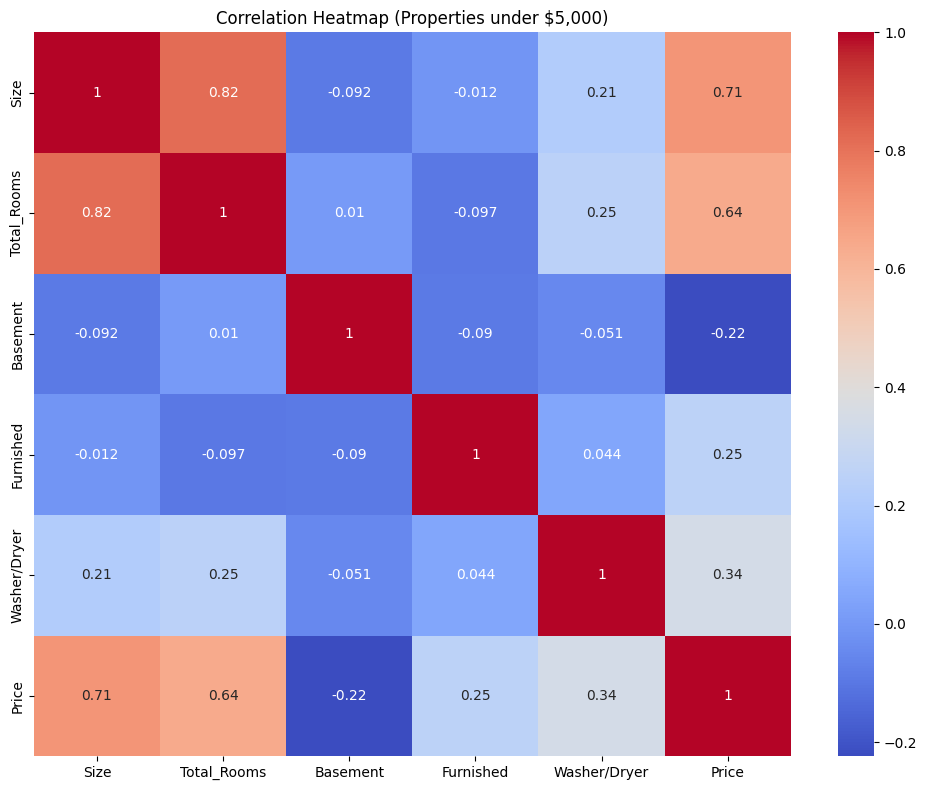

In [44]:
#Test model 7 (max price of $5000)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath, max_price=5000):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Filter data for prices below max_price
    data = data[data['Price'] <= max_price]
    
    # Create combined rooms feature
    data['Total_Rooms'] = data['Bedrooms'] + (0.8 * data['Bathrooms'])
    
    # Create feature matrix X and target variable y
    features = ['Size', 'Total_Rooms', 'Basement', 
                'Furnished', 'Washer/Dryer']
    
    X = data[features]
    y = data['Price']
    
    return data[features + ['Price']], X, y

def analyze_rental_data(filepath, max_price=5000):
    # Load data
    data, X, y = load_and_prepare_data(filepath, max_price)
    
    # Print data size after filtering
    print(f"Analyzing {len(data)} properties under ${max_price:,}")
    
    # 1. Basic Statistics
    print("\nBasic Statistics:")
    print(data.describe())
    print("\nCorrelation with Price:")
    print(data.corr()['Price'].sort_values(ascending=False))
    
    # 2. Multiple Linear Regression with statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print("\nDetailed Regression Results:")
    print(model.summary())
    
    # 3. Cross-validated R-squared score
    X_scaled = StandardScaler().fit_transform(X)
    lr = LinearRegression()
    cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
    print("\nCross-validated R-squared scores:", cv_scores)
    print("Mean R-squared:", cv_scores.mean())
    
    # 4. Feature importance
    lr.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Standardized Coefficient': lr.coef_
    })
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance.sort_values(by='Standardized Coefficient', ascending=False))
    
    # 5. Visualization of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Properties under ${max_price:,})')
    plt.tight_layout()
    plt.show()
    
    return model, lr, StandardScaler().fit(X)

def predict_rental_price(model_lr, scaler, features):
    """
    Predict rental price for new properties
    
    Parameters:
    features: dict or DataFrame with keys/columns matching training data
    """
    if isinstance(features, dict):
        features = pd.DataFrame([features])
    
    features_scaled = scaler.transform(features)
    prediction = model_lr.predict(features_scaled)
    
    return prediction

# Test the modified functions
file_path = r"c:\Users\grego\GitHub\DataAnalysis\data\test.csv" 
model_stats, model_lr, scaler = analyze_rental_data(file_path, max_price=5000)